# Data Exploration on Qbias Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import json
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("../data/allsides_balanced_news_headlines-texts.csv", index_col=0)

In [3]:
df

,title,tags,heading,source,text,bias_rating
0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left
...,...,...,...,...,...,...
21749,Biden Seeks $30 Billion For Disaster Aid And R...,"['Disaster', 'Joe Biden', 'Disaster Aid', 'Afg...",White House asks Congress to pass emergency fu...,Washington Post,The White House budget office Tuesday sent Con...,left
21750,Biden Seeks $30 Billion For Disaster Aid And R...,"['Disaster', 'Joe Biden', 'Disaster Aid', 'Afg...","Biden wants $30B for disaster aid, Afghan rese...",Washington Examiner,The White House budget office on Tuesday urged...,right
21751,US House Condemns QAnon Group,"['US House', 'QAnon', 'Free Speech', 'Politics']",Seventeen Republican congressmen and Justin Am...,Washington Examiner,The House passed a resolution condemning the c...,right
21752,US House Condemns QAnon Group,"['US House', 'QAnon', 'Free Speech', 'Politics']",Why did some Republicans balk at a resolution ...,NBC News (Online),As many Americans came to realize in recent mo...,left


## Simple Class Counting

In [4]:
classes = df["bias_rating"].unique()
count = {}

for i in classes:
    count[i] = len(df[df["bias_rating"] == i])

print(count)

{'left': 10275, 'center': 4253, 'right': 7226}


<BarContainer object of 3 artists>

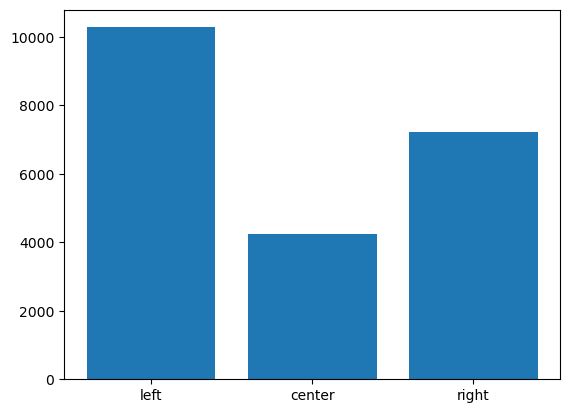

In [5]:
plt.bar(count.keys(), count.values())

## Relationship between Source & Bias

In [6]:
print(f"Number of sources: {len(df.source.unique())}")

Number of sources: 465


Top 5 Sources (Most Common in Qbias): source
Fox News (Online News)    2032
CNN (Online News)         1628
Washington Post           1257
New York Times (News)     1227
Washington Times           950
Name: count, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Fox News (Online News)'),
  Text(1, 0, 'CNN (Online News)'),
  Text(2, 0, 'Washington Post'),
  Text(3, 0, 'New York Times (News)'),
  Text(4, 0, 'Washington Times')])

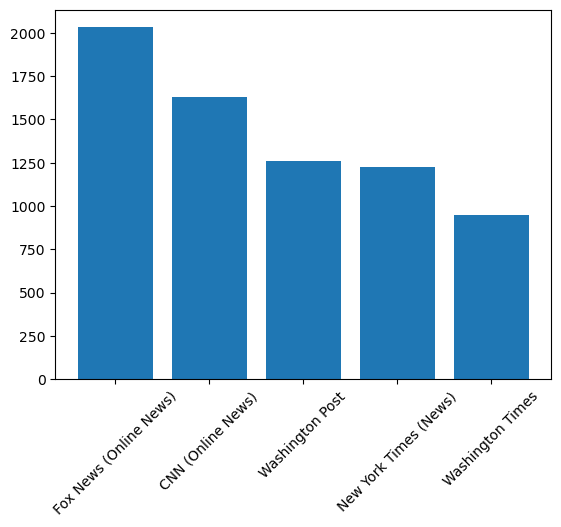

In [7]:
tmp_df = df[["source", "bias_rating"]]
source_count = tmp_df["source"].value_counts()
print(f"Top 5 Sources (Most Common in Qbias): {source_count.head(5)}")
plt.bar(source_count.head(5).index, source_count.head(5))
plt.xticks(rotation=45)

In [8]:
source_to_bias_distribution = {}

for source in source_count.head(5).index:
    source_to_bias_distribution[source] = {}
    for bias in tmp_df["bias_rating"].unique():
        source_to_bias_distribution[source][bias] = len(tmp_df[tmp_df["source"] == source][tmp_df["bias_rating"] == bias])

source_to_bias_distribution

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_11093/2808248655.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_to_bias_distribution[source][bias] = len(tmp_df[tmp_df["source"] == source][tmp_df["bias_rating"] == bias])
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_11093/2808248655.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_to_bias_distribution[source][bias] = len(tmp_df[tmp_df["source"] == source][tmp_df["bias_rating"] == bias])
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_11093/2808248655.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_to_bias_distribution[source][bias] = len(tmp_df[tmp_df["source"] == source][tmp_df["bias_rating"] == bias])
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_11093/2808248655.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_to_bias_

{'Fox News (Online News)': {'left': 0, 'center': 0, 'right': 2032},
 'CNN (Online News)': {'left': 1628, 'center': 0, 'right': 0},
 'Washington Post': {'left': 1257, 'center': 0, 'right': 0},
 'New York Times (News)': {'left': 1227, 'center': 0, 'right': 0},
 'Washington Times': {'left': 0, 'center': 0, 'right': 950}}

## Relevance of Heading & Text

### Length of Content

In [9]:
tmp_df = df[["heading", "text", "bias_rating"]]
tmp_df

,heading,text,bias_rating
0,Chicago Gun Violence Spikes and Increasingly F...,As Yasmin Miller drove home from a laundromat ...,left
1,‘Bullets just came from nowhere’: Fourth of Ju...,As many Chicagoans were celebrating the Fourth...,center
2,Dozens of shootings across US mark bloody July...,The nation’s 4th of July weekend was marred by...,right
3,Federal Government Will Run Out of Cash on Oct...,Treasury Secretary Janet Yellen on Tuesday war...,right
4,Yellen tells Congress that U.S. will run out o...,Treasury Secretary Janet Yellen on Tuesday tol...,left
...,...,...,...
21749,White House asks Congress to pass emergency fu...,The White House budget office Tuesday sent Con...,left
21750,"Biden wants $30B for disaster aid, Afghan rese...",The White House budget office on Tuesday urged...,right
21751,Seventeen Republican congressmen and Justin Am...,The House passed a resolution condemning the c...,right
21752,Why did some Republicans balk at a resolution ...,As many Americans came to realize in recent mo...,left


In [10]:
tmp_df = tmp_df.assign(heading_length=lambda x: x.heading.str.len())
tmp_df = tmp_df.assign(text_length=lambda x: x.text.str.len())
tmp_df

,heading,text,bias_rating,heading_length,text_length
0,Chicago Gun Violence Spikes and Increasingly F...,As Yasmin Miller drove home from a laundromat ...,left,71,522.0
1,‘Bullets just came from nowhere’: Fourth of Ju...,As many Chicagoans were celebrating the Fourth...,center,114,554.0
2,Dozens of shootings across US mark bloody July...,The nation’s 4th of July weekend was marred by...,right,58,550.0
3,Federal Government Will Run Out of Cash on Oct...,Treasury Secretary Janet Yellen on Tuesday war...,right,99,542.0
4,Yellen tells Congress that U.S. will run out o...,Treasury Secretary Janet Yellen on Tuesday tol...,left,83,579.0
...,...,...,...,...,...
21749,White House asks Congress to pass emergency fu...,The White House budget office Tuesday sent Con...,left,132,569.0
21750,"Biden wants $30B for disaster aid, Afghan rese...",The White House budget office on Tuesday urged...,right,80,535.0
21751,Seventeen Republican congressmen and Justin Am...,The House passed a resolution condemning the c...,right,96,553.0
21752,Why did some Republicans balk at a resolution ...,As many Americans came to realize in recent mo...,left,63,564.0


In [11]:
tmp_df.describe()

,heading_length,text_length
count,21754.000000,21747.000000
mean,67.333502,413.432014
std,19.549608,177.415331
min,8.000000,5.000000
25%,55.000000,232.000000
50%,66.000000,509.000000
75%,79.000000,564.000000
max,231.000000,821.000000


Text(0, 0.5, 'Density')

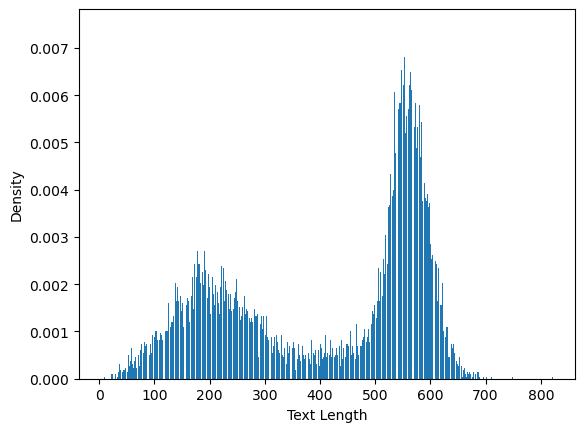

In [12]:
hist, bins = np.histogram(tmp_df["text_length"].dropna(), bins=10000)
# tmp_df["text_length"].count()

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["text_length"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Text Length")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

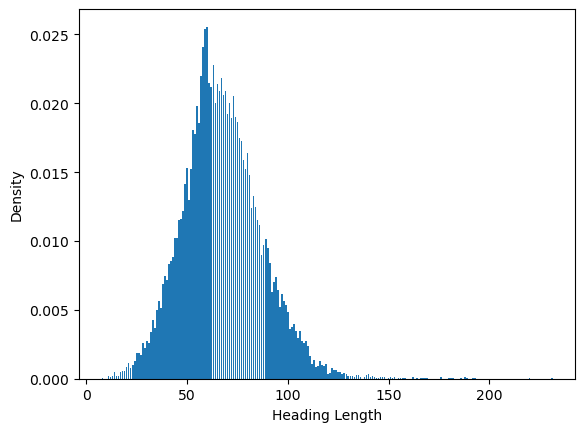

In [13]:
hist, bins = np.histogram(tmp_df["heading_length"].dropna(), bins=10000)
# tmp_df["text_length"].count()

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["heading_length"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Heading Length")
plt.ylabel("Density")

## t-Test between Text Length, Heading Length, and Bias Rating

In [14]:
## Encode the category column
tmp_df["bias_rating_encoded"] = tmp_df["bias_rating"]

tmp_df["bias_rating_encoded"].replace(tmp_df["bias_rating"].unique(), np.arange(0, len(tmp_df["bias_rating"].unique())), inplace=True)

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_11093/1411406816.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tmp_df["bias_rating_encoded"].replace(tmp_df["bias_rating"].unique(), np.arange(0, len(tmp_df["bias_rating"].unique())), inplace=True)
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_11093/1411406816.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

In [15]:
tmp_df

,heading,text,bias_rating,heading_length,text_length,bias_rating_encoded
0,Chicago Gun Violence Spikes and Increasingly F...,As Yasmin Miller drove home from a laundromat ...,left,71,522.0,0
1,‘Bullets just came from nowhere’: Fourth of Ju...,As many Chicagoans were celebrating the Fourth...,center,114,554.0,1
2,Dozens of shootings across US mark bloody July...,The nation’s 4th of July weekend was marred by...,right,58,550.0,2
3,Federal Government Will Run Out of Cash on Oct...,Treasury Secretary Janet Yellen on Tuesday war...,right,99,542.0,2
4,Yellen tells Congress that U.S. will run out o...,Treasury Secretary Janet Yellen on Tuesday tol...,left,83,579.0,0
...,...,...,...,...,...,...
21749,White House asks Congress to pass emergency fu...,The White House budget office Tuesday sent Con...,left,132,569.0,0
21750,"Biden wants $30B for disaster aid, Afghan rese...",The White House budget office on Tuesday urged...,right,80,535.0,2
21751,Seventeen Republican congressmen and Justin Am...,The House passed a resolution condemning the c...,right,96,553.0,2
21752,Why did some Republicans balk at a resolution ...,As many Americans came to realize in recent mo...,left,63,564.0,0


In [16]:
tmp_df = tmp_df.dropna()
tmp_df

,heading,text,bias_rating,heading_length,text_length,bias_rating_encoded
0,Chicago Gun Violence Spikes and Increasingly F...,As Yasmin Miller drove home from a laundromat ...,left,71,522.0,0
1,‘Bullets just came from nowhere’: Fourth of Ju...,As many Chicagoans were celebrating the Fourth...,center,114,554.0,1
2,Dozens of shootings across US mark bloody July...,The nation’s 4th of July weekend was marred by...,right,58,550.0,2
3,Federal Government Will Run Out of Cash on Oct...,Treasury Secretary Janet Yellen on Tuesday war...,right,99,542.0,2
4,Yellen tells Congress that U.S. will run out o...,Treasury Secretary Janet Yellen on Tuesday tol...,left,83,579.0,0
...,...,...,...,...,...,...
21749,White House asks Congress to pass emergency fu...,The White House budget office Tuesday sent Con...,left,132,569.0,0
21750,"Biden wants $30B for disaster aid, Afghan rese...",The White House budget office on Tuesday urged...,right,80,535.0,2
21751,Seventeen Republican congressmen and Justin Am...,The House passed a resolution condemning the c...,right,96,553.0,2
21752,Why did some Republicans balk at a resolution ...,As many Americans came to realize in recent mo...,left,63,564.0,0


In [17]:

t_stat, p_val = stats.ttest_ind(tmp_df["text_length"], tmp_df["bias_rating_encoded"], equal_var=False)
print("For text length & bias rating")
print({
    "t_stat": format(t_stat, '.10g'),
    "p_val": format(p_val, '.100g')
})

For text length & bias rating
{'t_stat': '342.9281942', 'p_val': '0'}


In [18]:

t_stat, p_val = stats.ttest_ind(tmp_df["heading_length"], tmp_df["bias_rating_encoded"], equal_var=False)
print("For heading length & bias rating")
print({
    "t_stat": format(t_stat, '.10g'),
    "p_val": format(p_val, '.100g')
})

For heading length & bias rating
{'t_stat': '500.9128724', 'p_val': '0'}


## Non-alphabet Counting

In [19]:
import re

tmp_df = tmp_df.assign(text_non_alpha_count=lambda x: x["text"]
    .str.replace(" ", "", regex=True)  # Remove spaces
    .apply(lambda s: len(re.findall(r"[^a-zA-Z0-9]", s))))

tmp_df = tmp_df.assign(heading_non_alpha_count=lambda x: x["heading"]
    .str.replace(" ", "", regex=True)  # Remove spaces
    .apply(lambda s: len(re.findall(r"[^a-zA-Z0-9]", s))))

tmp_df

,heading,text,bias_rating,heading_length,text_length,bias_rating_encoded,text_non_alpha_count,heading_non_alpha_count
0,Chicago Gun Violence Spikes and Increasingly F...,As Yasmin Miller drove home from a laundromat ...,left,71,522.0,0,24,0
1,‘Bullets just came from nowhere’: Fourth of Ju...,As many Chicagoans were celebrating the Fourth...,center,114,554.0,1,18,7
2,Dozens of shootings across US mark bloody July...,The nation’s 4th of July weekend was marred by...,right,58,550.0,2,26,0
3,Federal Government Will Run Out of Cash on Oct...,Treasury Secretary Janet Yellen on Tuesday war...,right,99,542.0,2,15,3
4,Yellen tells Congress that U.S. will run out o...,Treasury Secretary Janet Yellen on Tuesday tol...,left,83,579.0,0,21,3
...,...,...,...,...,...,...,...,...
21749,White House asks Congress to pass emergency fu...,The White House budget office Tuesday sent Con...,left,132,569.0,0,13,1
21750,"Biden wants $30B for disaster aid, Afghan rese...",The White House budget office on Tuesday urged...,right,80,535.0,2,15,2
21751,Seventeen Republican congressmen and Justin Am...,The House passed a resolution condemning the c...,right,96,553.0,2,23,0
21752,Why did some Republicans balk at a resolution ...,As many Americans came to realize in recent mo...,left,63,564.0,0,25,1


Text(0, 0.5, 'Density')

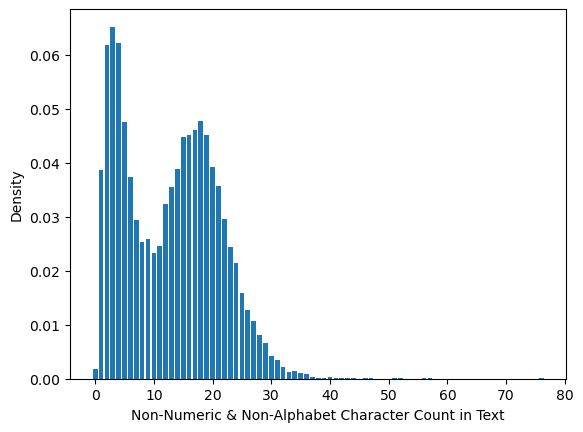

In [20]:
hist, bins = np.histogram(tmp_df["text_non_alpha_count"].dropna(), bins=10000)

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["text_non_alpha_count"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Non-Numeric & Non-Alphabet Character Count in Text")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

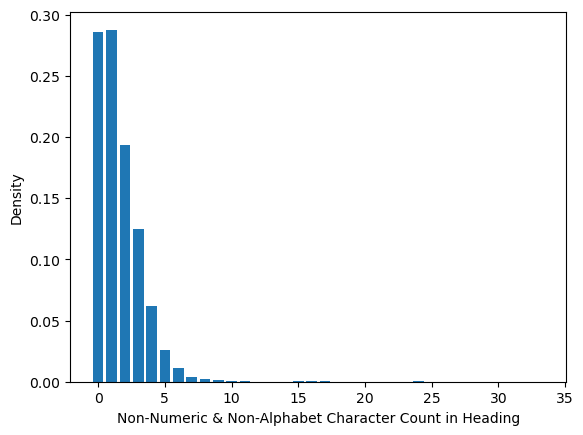

In [21]:
hist, bins = np.histogram(tmp_df["heading_non_alpha_count"].dropna(), bins=10000)

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["heading_non_alpha_count"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Non-Numeric & Non-Alphabet Character Count in Heading")
plt.ylabel("Density")

## Semantic Analysis

In [51]:
tmp_df = tmp_df.dropna()
tmp_df["text"] = tmp_df["text"].apply(str)
tmp_df["heading"] = tmp_df["heading"].apply(str)

In [58]:
import spacy

nlp = spacy.load("en_core_web_sm")

def count_adjectives(text):
    # if not isinstance(text, str) or pd.isna(text):  # Handle NaN values
    #     return 0 
    doc = nlp(str(text))
    return sum(1 for token in doc if token.pos_ == "ADJ")

def count_adverbs(text):
    # if not isinstance(text, str) or pd.isna(text):  # Handle NaN values
    #     return 0 
    doc = nlp(str(text))
    return sum(1 for token in doc if token.pos_ == "ADV")


def count_verbs(text):
    # if not isinstance(text, str) or pd.isna(text):  # Handle NaN values
    #     return 0 
    doc = nlp(str(text))
    return sum(1 for token in doc if token.pos_ == "VERB")

In [59]:
tmp_df["text_adj_count"] = tmp_df["text"].apply(count_adjectives)
tmp_df["heading_adj_count"] = tmp_df["heading"].apply(count_adjectives)

tmp_df

,heading,text,bias_rating,heading_length,text_length,bias_rating_encoded,text_non_alpha_count,heading_non_alpha_count,text_adj_count,heading_adj_count
0,Chicago Gun Violence Spikes and Increasingly F...,As Yasmin Miller drove home from a laundromat ...,left,71,522.0,0,24,0,6,1
1,‘Bullets just came from nowhere’: Fourth of Ju...,As many Chicagoans were celebrating the Fourth...,center,114,554.0,1,18,7,8,2
2,Dozens of shootings across US mark bloody July...,The nation’s 4th of July weekend was marred by...,right,58,550.0,2,26,0,7,2
3,Federal Government Will Run Out of Cash on Oct...,Treasury Secretary Janet Yellen on Tuesday war...,right,99,542.0,2,15,3,5,0
4,Yellen tells Congress that U.S. will run out o...,Treasury Secretary Janet Yellen on Tuesday tol...,left,83,579.0,0,21,3,4,0
...,...,...,...,...,...,...,...,...,...,...
21749,White House asks Congress to pass emergency fu...,The White House budget office Tuesday sent Con...,left,132,569.0,0,13,1,4,1
21750,"Biden wants $30B for disaster aid, Afghan rese...",The White House budget office on Tuesday urged...,right,80,535.0,2,15,2,5,2
21751,Seventeen Republican congressmen and Justin Am...,The House passed a resolution condemning the c...,right,96,553.0,2,23,0,5,1
21752,Why did some Republicans balk at a resolution ...,As many Americans came to realize in recent mo...,left,63,564.0,0,25,1,14,0


In [60]:
tmp_df["text_adv_count"] = tmp_df["text"].apply(count_adverbs)
tmp_df["heading_adv_count"] = tmp_df["heading"].apply(count_adverbs)

tmp_df

,heading,text,bias_rating,heading_length,text_length,bias_rating_encoded,text_non_alpha_count,heading_non_alpha_count,text_adj_count,heading_adj_count,text_adv_count,heading_adv_count
0,Chicago Gun Violence Spikes and Increasingly F...,As Yasmin Miller drove home from a laundromat ...,left,71,522.0,0,24,0,6,1,1,1
1,‘Bullets just came from nowhere’: Fourth of Ju...,As many Chicagoans were celebrating the Fourth...,center,114,554.0,1,18,7,8,2,4,3
2,Dozens of shootings across US mark bloody July...,The nation’s 4th of July weekend was marred by...,right,58,550.0,2,26,0,7,2,3,0
3,Federal Government Will Run Out of Cash on Oct...,Treasury Secretary Janet Yellen on Tuesday war...,right,99,542.0,2,15,3,5,0,4,0
4,Yellen tells Congress that U.S. will run out o...,Treasury Secretary Janet Yellen on Tuesday tol...,left,83,579.0,0,21,3,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21749,White House asks Congress to pass emergency fu...,The White House budget office Tuesday sent Con...,left,132,569.0,0,13,1,4,1,2,2
21750,"Biden wants $30B for disaster aid, Afghan rese...",The White House budget office on Tuesday urged...,right,80,535.0,2,15,2,5,2,0,0
21751,Seventeen Republican congressmen and Justin Am...,The House passed a resolution condemning the c...,right,96,553.0,2,23,0,5,1,4,0
21752,Why did some Republicans balk at a resolution ...,As many Americans came to realize in recent mo...,left,63,564.0,0,25,1,14,0,9,0


In [61]:
tmp_df["text_verbs_count"] = tmp_df["text"].apply(count_verbs)
tmp_df["heading_verbs_count"] = tmp_df["heading"].apply(count_verbs)

tmp_df

,heading,text,bias_rating,heading_length,text_length,bias_rating_encoded,text_non_alpha_count,heading_non_alpha_count,text_adj_count,heading_adj_count,text_adv_count,heading_adv_count,text_verbs_count,heading_verbs_count
0,Chicago Gun Violence Spikes and Increasingly F...,As Yasmin Miller drove home from a laundromat ...,left,71,522.0,0,24,0,6,1,1,1,12,1
1,‘Bullets just came from nowhere’: Fourth of Ju...,As many Chicagoans were celebrating the Fourth...,center,114,554.0,1,18,7,8,2,4,3,8,3
2,Dozens of shootings across US mark bloody July...,The nation’s 4th of July weekend was marred by...,right,58,550.0,2,26,0,7,2,3,0,10,0
3,Federal Government Will Run Out of Cash on Oct...,Treasury Secretary Janet Yellen on Tuesday war...,right,99,542.0,2,15,3,5,0,4,0,17,3
4,Yellen tells Congress that U.S. will run out o...,Treasury Secretary Janet Yellen on Tuesday tol...,left,83,579.0,0,21,3,4,0,0,0,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21749,White House asks Congress to pass emergency fu...,The White House budget office Tuesday sent Con...,left,132,569.0,0,13,1,4,1,2,2,10,3
21750,"Biden wants $30B for disaster aid, Afghan rese...",The White House budget office on Tuesday urged...,right,80,535.0,2,15,2,5,2,0,0,13,1
21751,Seventeen Republican congressmen and Justin Am...,The House passed a resolution condemning the c...,right,96,553.0,2,23,0,5,1,4,0,14,2
21752,Why did some Republicans balk at a resolution ...,As many Americans came to realize in recent mo...,left,63,564.0,0,25,1,14,0,9,0,8,2


Text(0, 0.5, 'Density')

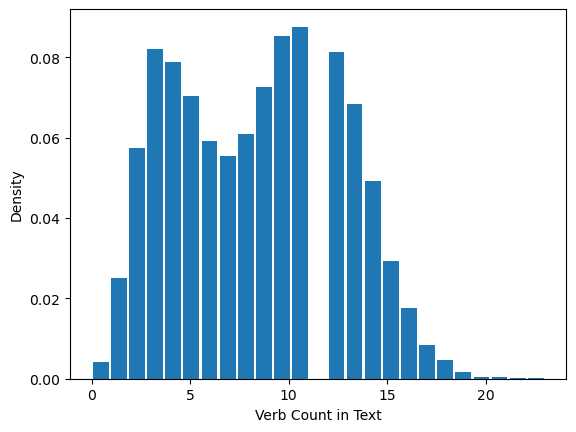

In [62]:
hist, bins = np.histogram(tmp_df["text_verbs_count"].dropna(), bins=25)

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["text_verbs_count"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Verb Count in Text")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

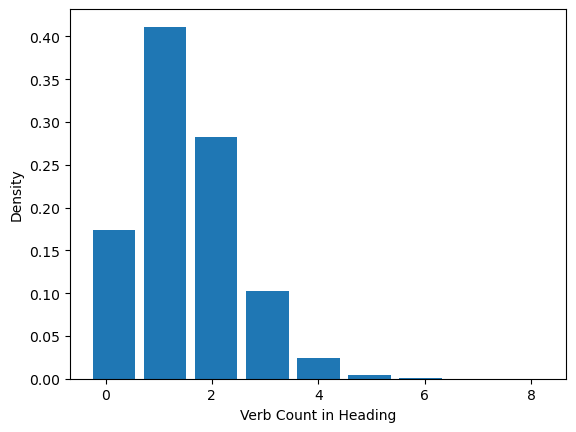

In [63]:
hist, bins = np.histogram(tmp_df["heading_verbs_count"].dropna(), bins=25)

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["heading_verbs_count"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Verb Count in Heading")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

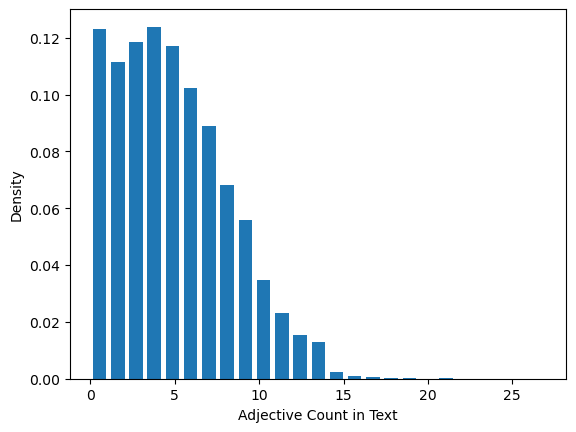

In [64]:
hist, bins = np.histogram(tmp_df["text_adj_count"].dropna(), bins=25)

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["text_adj_count"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Adjective Count in Text")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

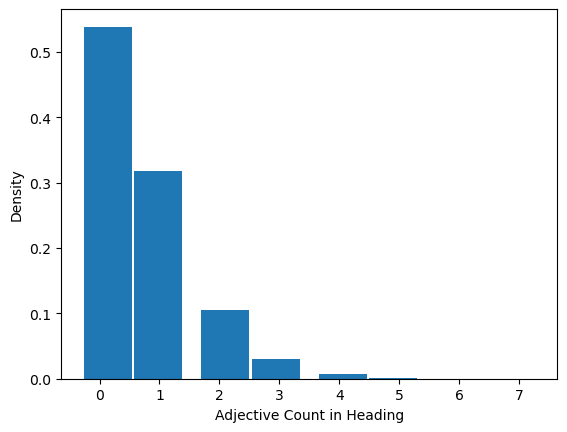

In [65]:
hist, bins = np.histogram(tmp_df["heading_adj_count"].dropna(), bins=25)

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["heading_adj_count"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Adjective Count in Heading")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

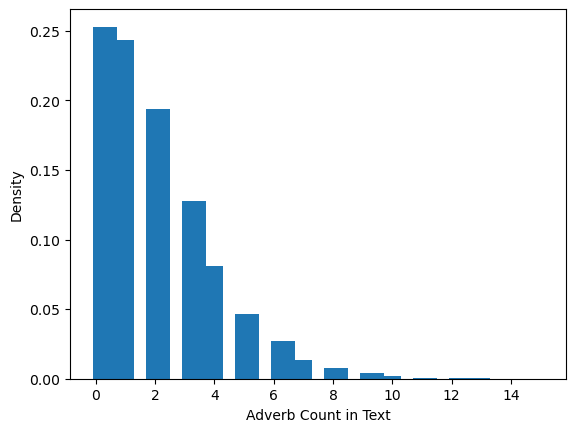

In [66]:
hist, bins = np.histogram(tmp_df["text_adv_count"].dropna(), bins=25)

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["text_adv_count"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Adverb Count in Text")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

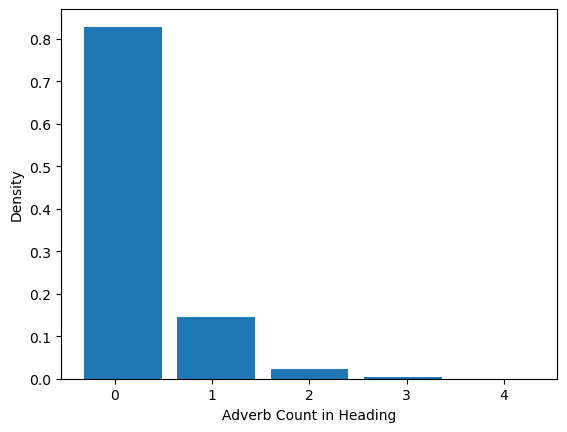

In [67]:
hist, bins = np.histogram(tmp_df["heading_adv_count"].dropna(), bins=25)

plot_var = {}
for i in range(len(hist)):
    plot_var[bins[i] + (bins[i+1] - bins[i])/2] = hist[i] / tmp_df["heading_adv_count"].dropna().count()

plt.bar(plot_var.keys(), plot_var.values())
plt.xlabel("Adverb Count in Heading")
plt.ylabel("Density")

In [69]:
tmp_df.to_csv("data-analysis.csv", index=False)

In [78]:
print(f"Overall text length average: {tmp_df['text_length'].mean()}")
print(f"Overall heading length average: {tmp_df['heading_length'].mean()}")
print(f"Overall text verb count average: {tmp_df['text_verbs_count'].mean()}")
print(f"Overall heading verb count average: {tmp_df['heading_verbs_count'].mean()}")
print(f"Overall text adverb count average: {tmp_df['text_adv_count'].mean()}")
print(f"Overall heading adverb count average: {tmp_df['heading_adv_count'].mean()}")
print(f"Overall text adjective count average: {tmp_df['text_adj_count'].mean()}")
print(f"Overall heading adjective count average: {tmp_df['heading_adj_count'].mean()}")


print(f"Overall text verb count average: {tmp_df['text_verbs_count'].mean() / tmp_df['text_length'].mean()}")
print(f"Overall heading verb count average: {tmp_df['heading_verbs_count'].mean() / tmp_df['heading_length'].mean()}")
print(f"Overall text adverb count average: {tmp_df['text_adv_count'].mean() / tmp_df['text_length'].mean()}")
print(f"Overall heading adverb count average: {tmp_df['heading_adv_count'].mean() / tmp_df['heading_length'].mean()}")
print(f"Overall text adjective count average: {tmp_df['text_adj_count'].mean() / tmp_df['text_length'].mean()}")
print(f"Overall heading adjective count average: {tmp_df['heading_adj_count'].mean() / tmp_df['heading_length'].mean()}")

Overall text length average: 413.4320136110728
Overall heading length average: 67.33494275072424
Overall text verb count average: 8.305191520669517
Overall heading verb count average: 1.4077803835011726
Overall text adverb count average: 1.9576953142962248
Overall heading adverb count average: 0.2006713569687773
Overall text adjective count average: 5.061019910792293
Overall heading adjective count average: 0.6559985285326712
Overall text verb count average: 0.02008840933271908
Overall heading verb count average: 0.020907129730737477
Overall text adverb count average: 0.004735229130412441
Overall heading adverb count average: 0.002980196444387991
Overall text adjective count average: 0.012241480447020578
Overall heading adjective count average: 0.009742319540705563
